# Finale Auswertung


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_EA = pd.read_csv('Data/EA3.csv', index_col=[0], sep=';')
#df_EA = pd.read_csv('Data/EA3_win.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = df_EA.iloc[df_EA.index.get_level_values('Evolution') == 36]
domi

Coord  Winner      Fitness  GameTime       Score  \
Evolution Name                                                                
36        KI_0    <3468, 5, 958>    True  1910.019608      1598  109.019608   
          KI_1    <3468, 5, 958>    True   290.000000       580  120.000000   
          KI_2    <3468, 5, 958>    True   270.000000       569  120.000000   
          KI_3    <3468, 5, 958>    True   312.500000       299  112.500000   
          KI_4    <3468, 5, 958>    True   304.761905       362  104.761905   
          KI_5    <3468, 5, 958>    True   314.285714       342  114.285714   
          KI_6    <3468, 5, 958>    True   318.000000       479  118.000000   
          KI_7    <3468, 5, 958>    True   312.307692       523  112.307692   
          KI_8    <3468, 5, 958>    True   305.217391       299  105.217391   
          KI_9    <3468, 5, 958>    True   312.000000       327  112.000000   
          KI_10   <3468, 5, 958>    True   310.000000       326  110.000000   
          KI_11   <3468, 5, 958>    True   307.500000       256  107.500000   
          KI_12   <3468, 5, 958>    True   320.000000       455  105.000000   
          KI_13   <3468, 5, 958>    True   308.333333       234  108.333333   
          KI_14   <3468, 5, 958>    True   317.500000       338  117.500000   
          KI_15   <3468, 5, 958>    True   308.545455       585  104.545455   
          KI_16   <3468, 5, 958>    True   306.315789       276  106.315789   
          KI_17   <3468, 5, 958>    True   309.166667       445  109.166667   
          KI_18   <3468, 5, 958>    True  1125.827586      1422  114.827586   
          KI_19   <3468, 5, 958>    True   308.000000       316  108.000000   
          KI_20   <3468, 5, 958>    True   305.882353       281  105.882353   
          KI_21   <3468, 5, 958>    True   315.000000       254  115.000000   
          KI_22   <3468, 5, 958>    True   314.000000       363  114.000000   
          KI_23   <3468, 5, 958>    True   306.250000       251  106.250000   
          KI_24   <3468, 5, 958>    True   309.230769       369  109.230769   
          KI_25   <3468, 5, 958>    True   307.058824       292  107.058824   
          KI_26   <3468, 5, 958>    True   307.500000       256  107.500000   
          KI_27   <3468, 5, 958>    True  2176.795918      1762  109.795918   
          KI_28   <3468, 5, 958>    True   315.000000       369  115.000000   
          KI_29   <3468, 5, 958>    True   312.000000       398  112.000000   
          KI_30   <3468, 5, 958>    True   312.500000       271  112.500000   
          KI_31   <3468, 5, 958>    True   304.516129       388  104.516129   
          KI_32   <3468, 5, 958>    True   312.000000       339  112.000000   
          KI_33   <3468, 5, 958>    True   275.666667       925  121.666667   
          KI_34   <3468, 5, 958>    True  1227.857143      1318  112.857143   
          KI_35   <3468, 5, 958>    True   864.200000      1320  111.200000   
          KI_36   <3468, 5, 958>    True   390.931034       806  117.931034   
          KI_37   <3468, 5, 958>    True  1797.000000      2458  112.000000   
          KI_38   <3468, 5, 958>    True   489.142857       621  117.142857   
          KI_39   <3468, 5, 958>    True   427.363636       596  116.363636   
          KI_40   <3468, 5, 958>    True   672.037037       832  117.037037   
          KI_41   <3468, 5, 958>    True   498.333333       589  118.333333   
          KI_42   <3468, 5, 958>    True  1103.304348      1223  111.304348   
          KI_43   <3468, 5, 958>    True   300.000000       474  120.000000   
          KI_44   <3468, 5, 958>    True   280.000000       513  120.000000   
          KI_45   <3468, 5, 958>    True   270.000000       649  120.000000   
          KI_46   <3468, 5, 958>    True   595.000000       739  117.000000   
          KI_47   <3468, 5, 958>    True   774.384615       765  115.384615   
          KI_48   <3468, 5, 958>    True  1541.074074      2412  114.074074  

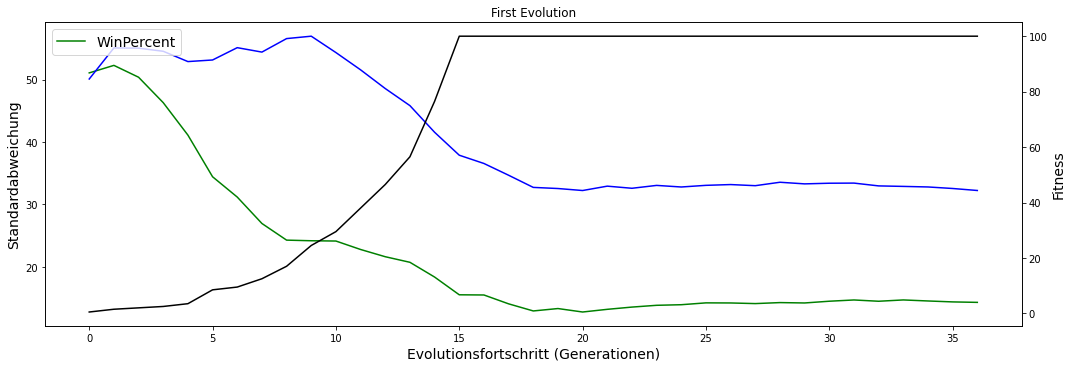

In [33]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsfortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)

#WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='green', label='WinPercent')
#Fitness, = ax1.plot(df_Mean["supp1-ConquerRadius"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["supp2-ConquerRadius"].values, color='red', label='Fitness')
Fitness, = ax1.plot(df_Mean["off1-AttackMinLife"].values, color='green', label='Fitness')
Fitness, = ax1.plot(df_Mean["off2-AttackMinLife"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(domi["Score"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(domi["suppScore"].values, color='green', label='Fitness')
#std, = ax1.plot(df_standardDeviation["off1-AttackMinLife"].values, color='blue', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["off2-AttackMinLife"].values, color='red', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["supp-AttackMinLife"].values, color='green', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(domi["Winner"].values, color='black', label='Fitness')
ax2.plot(df_Mean["WinPercent"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


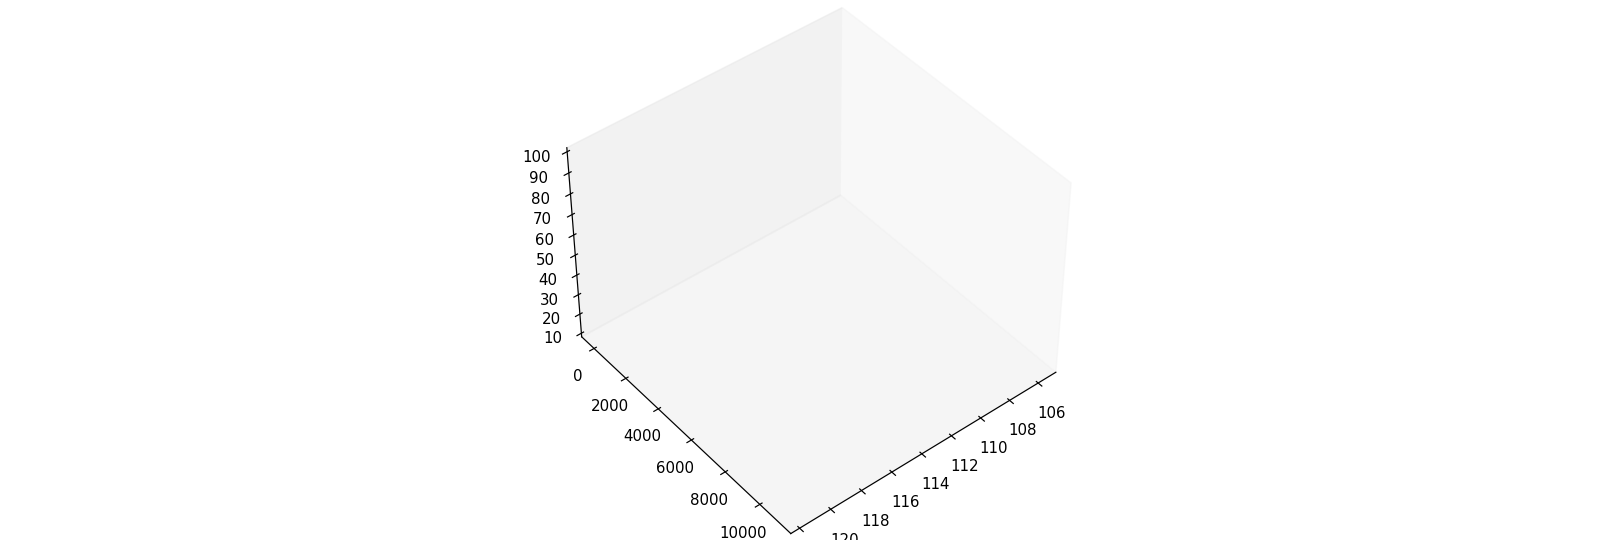

In [340]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d as plt3d

fig = plt.figure()
ax = plt3d.Axes3D(fig)

ax.view_init(45, -45)
ax.grid(False)
#ax.set_zlim(-100, 0)
#plt.xlim(0, 600)
#plt.ylim(0, 50)
colors1 = cm.colors.LinearSegmentedColormap.from_list("", ["red","red"])
colors2 = cm.colors.LinearSegmentedColormap.from_list("", ["green","green"])
colors3 = cm.colors.LinearSegmentedColormap.from_list("", ["blue","blue"])
#fig.colorbar(points, shrink=0.5, aspect=5)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi4 = df_EA[df_EA['dominanceLevel'] == 4]
domi = domi4.iloc[domi4.index.get_level_values('Evolution') == 27]

# Data for three-dimensional scattered points
zdata = domi["deffScore"].values
xdata = domi["Score"].values
ydata = domi["suppScore"].values

#points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors, vmin=-85, vmax=-10);
points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
#ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none');
ax.set_title('Score');
ax.set_xlabel('Attack')
ax.set_ylabel('Support')
ax.set_zlabel('Defensive');


def animate_scatters(iteration, points,zdata,ydata,xdata):
    domiA = domi1.iloc[domi1.index.get_level_values('Evolution') == iteration]
    domiB = domi2.iloc[domi2.index.get_level_values('Evolution') == iteration]
    domiC = domi3.iloc[domi3.index.get_level_values('Evolution') == iteration]
    
    ax.clear()
    ax.set_title("Score");
    ax.grid(False)
    #ax.set_zlim(-500, 0)
    #plt.xlim(0, 1500)
    #plt.ylim(0, 100)
    
    # Data for three-dimensional scattered points
    zdata = domiA["deffScore"].values
    xdata = domiA["Score"].values
    ydata = domiA["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
    zdata = domiB["deffScore"].values
    xdata = domiB["Score"].values
    ydata = domiB["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors2)
    zdata = domiC["deffScore"].values
    xdata = domiC["Score"].values
    ydata = domiC["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors3)
    
    return points

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_scatters, fargs=(points,zdata,ydata,xdata), interval=1000, blit=False)
plt.show()